In [1]:
import pandas as pd
import numpy as np
# !pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

### ```Conjunto de datos de business.pk```

In [2]:
path_1 = 'yelp/business.pkl'

In [3]:

df1 = pd.read_pickle(path_1)
df1bus = df1.iloc[:, :14]


In [4]:
df1bus.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [6]:
# Mostrar filas duplicadas en la columna 'business_id'
duplicated_business_ids = df1bus[df1bus.duplicated(subset='business_id', keep=False)]

###  ```Generamos una gráfica para visualizar las categorías que más reseñas positivas tienen```

In [4]:
# Filtrar reseñas positivas (estrellas >= 4)
df1bus_positive = df1bus[df1bus['stars'] >= 4]

# Expandir las categorías
df1bus_positive['categories'] = df1bus_positive['categories'].str.split(', ')

/tmp/ipykernel_4773/1189236862.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1bus_positive['categories'] = df1bus_positive['categories'].str.split(', ')


In [5]:
# Explode para que cada categoría tenga su propia fila
df1bus_expanded = df1bus_positive.explode('categories')


In [6]:
df1bus_expanded.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},Doctors,None
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},Traditional Chinese Medicine,None
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},Naturopathic/Holistic,None
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},Acupuncture,None
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},Health & Medical,None


In [7]:
# Contar la cantidad de reseñas por categoría
category_counts = df1bus_expanded.groupby('categories')['review_count'].sum().sort_values(ascending=False)

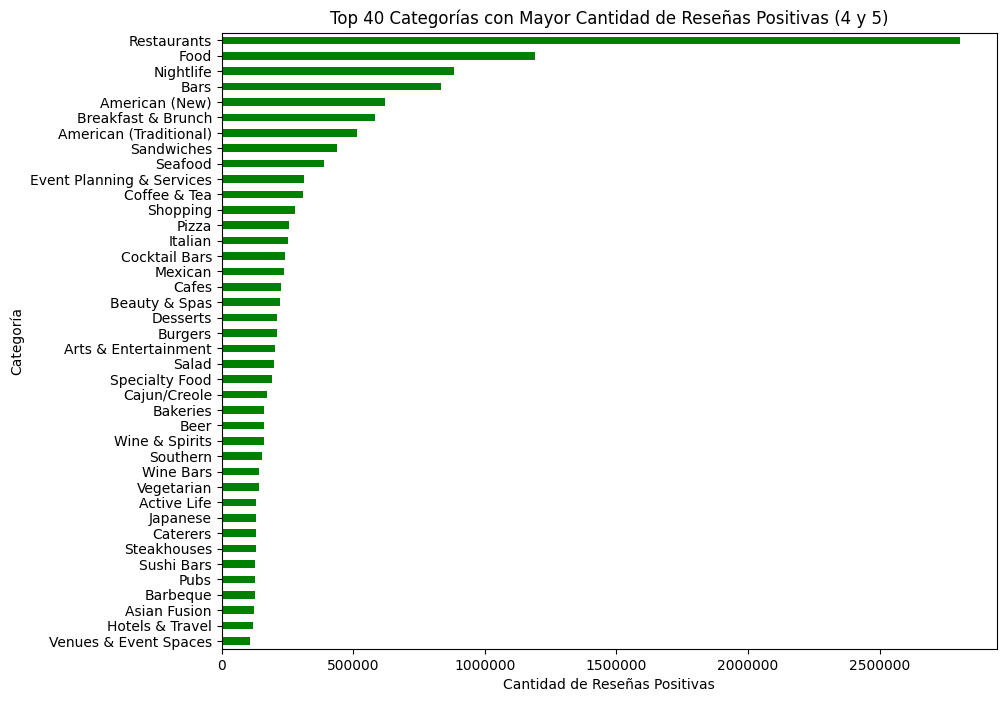

In [8]:
# Seleccionar las 40 categorías principales
top_40_categories = category_counts.head(40)

plt.figure(figsize=(10, 8))
top_40_categories.plot(kind='barh', color='green')

# Cambiar la notación científica en el eje x
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('Cantidad de Reseñas Positivas')
plt.ylabel('Categoría')
plt.title('Top 40 Categorías con Mayor Cantidad de Reseñas Positivas (4 y 5)')
plt.gca().invert_yaxis()  # Para que la categoría con más reseñas esté en la parte superior
# Guardar la imagen antes de mostrarla
plt.savefig('top_40_categorias_bus.png', dpi=300, bbox_inches='tight')

plt.show()

Realizamos una gráfica que muestre un top ten de las categorías más frecuentes

/tmp/ipykernel_4773/679673059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1bus['first_category'] = df1bus['categories'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else None)
/tmp/ipykernel_4773/679673059.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1bus['positive_reviews'] = df1bus.apply(lambda row: row['review_count'] if row['stars'] >= 4 else 0, axis=1)


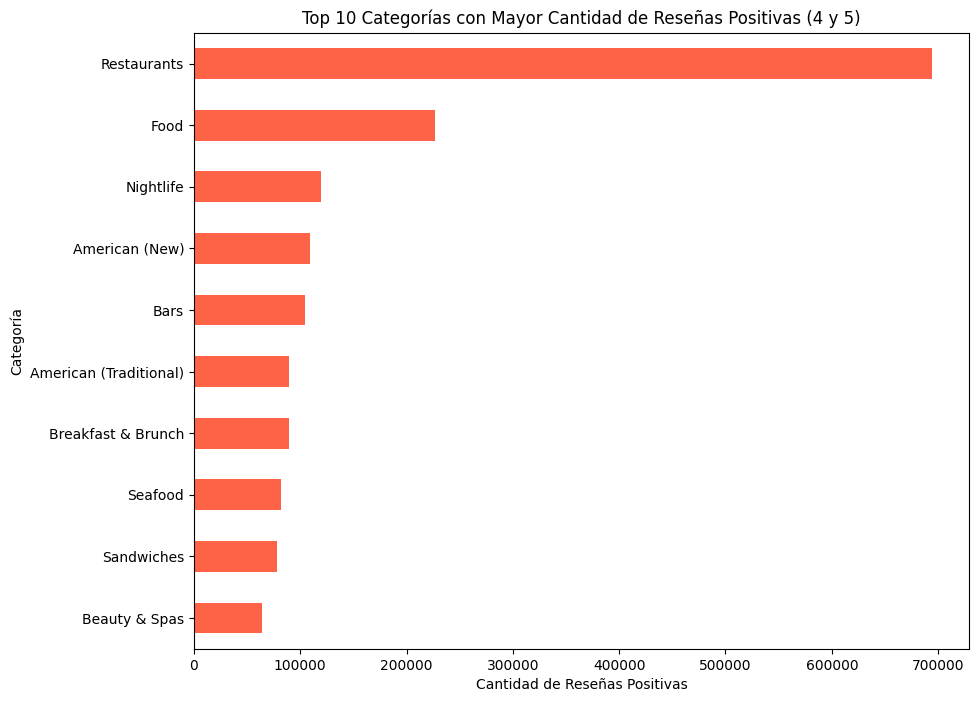

In [10]:
# Extraer la primera categoría de cada lista
df1bus['first_category'] = df1bus['categories'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else None)

# Contar la cantidad de reseñas positivas (suponiendo que 4 y 5 son positivas)
df1bus['positive_reviews'] = df1bus.apply(lambda row: row['review_count'] if row['stars'] >= 4 else 0, axis=1)

# Agrupar por la primera categoría y sumar las reseñas positivas
category_counts = df1bus.groupby('first_category')['positive_reviews'].sum()

# Seleccionar las 10 categorías más comunes
top_10 = category_counts.nlargest(10)

# Graficar las 10 categorías con más reseñas positivas
plt.figure(figsize=(10, 8))
top_10.plot(kind='barh', color='tomato')

# Cambiar la notación científica en el eje x
plt.ticklabel_format(style='plain', axis='x')

plt.xlabel('Cantidad de Reseñas Positivas')
plt.ylabel('Categoría')
plt.title('Top 10 Categorías con Mayor Cantidad de Reseñas Positivas (4 y 5)')
plt.gca().invert_yaxis()  # Para que la categoría con más reseñas esté en la parte superior
# Guardar la imagen antes de mostrarla
plt.savefig('top_10_categorias_bus.png', dpi=300, bbox_inches='tight')
plt.show()

In [22]:
top_40_2

first_category
Restaurants                  694227
Food                         227127
Nightlife                    119531
American (New)               109245
Bars                         104091
American (Traditional)        89209
Breakfast & Brunch            88979
Seafood                       82055
Sandwiches                    77817
Beauty & Spas                 64174
Mexican                       63231
Italian                       61189
Pizza                         56561
Coffee & Tea                  53601
Shopping                      53540
Event Planning & Services     49176
Burgers                       42493
Cocktail Bars                 37006
Cajun/Creole                  36922
Arts & Entertainment          36725
Cafes                         35163
Active Life                   33087
Bakeries                      32002
Sushi Bars                    31728
Japanese                      30291
Specialty Food                30005
Ice Cream & Frozen Yogurt     29586
Desserts     

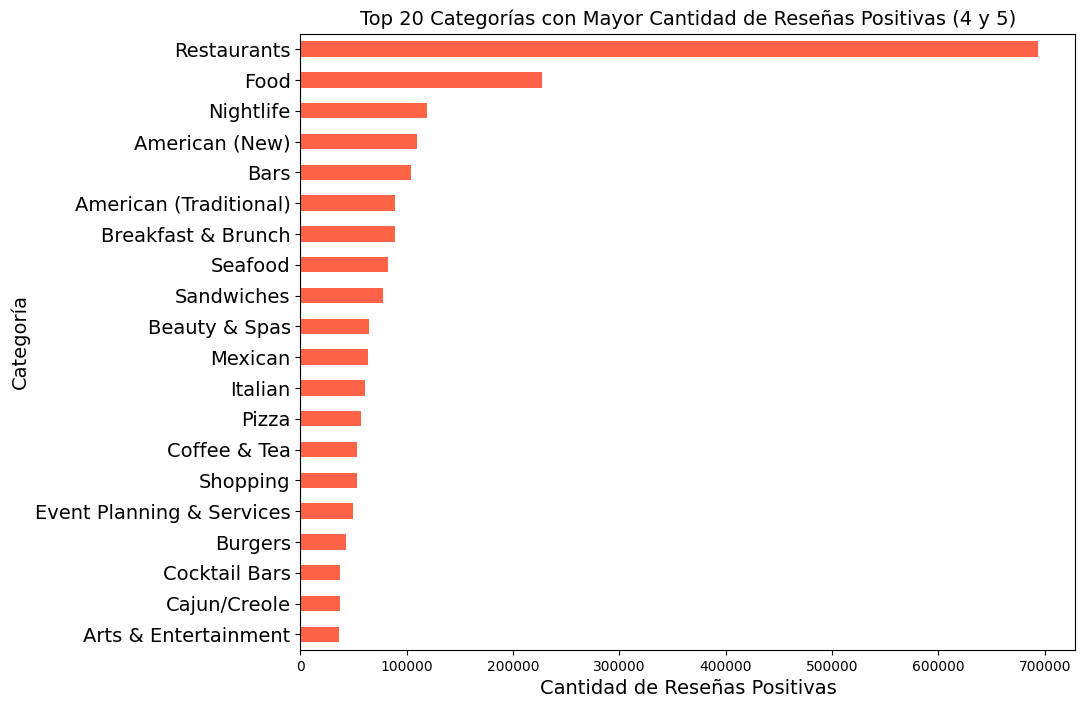

In [17]:
# Seleccionar las 20 categorías más comunes
top_20 = category_counts.nlargest(20)

# Graficar las 20 categorías con más reseñas positivas
plt.figure(figsize=(10, 8))
top_20.plot(kind='barh', color='tomato')

# Cambiar la notación científica en el eje x
plt.ticklabel_format(style='plain', axis='x')

# Aumentar el tamaño de las etiquetas de los ejes
plt.xlabel('Cantidad de Reseñas Positivas', fontsize=14)
plt.ylabel('Categoría', fontsize=14)
plt.title('Top 20 Categorías con Mayor Cantidad de Reseñas Positivas (4 y 5)', fontsize=14)
plt.gca().invert_yaxis()  # Para que la categoría con más reseñas esté en la parte superior
# Aumentar el tamaño de las etiquetas de las categorías en el eje y
plt.yticks(fontsize=14)
# Guardar la imagen antes de mostrarla
plt.savefig('top_20_categorias_bus.png', dpi=300, bbox_inches='tight')
plt.show()

In [24]:
# Filtrar el DataFrame para obtener solo las filas donde la categoría es "Restaurants"
df_breakfast = df1bus[df1bus['first_category'] == 'Breakfast & Brunch']

# Guardar el nuevo DataFrame como un archivo CSV
df_breakfast.to_csv('df_breakfast.csv', index=False)


In [25]:
# Filtrar el DataFrame para incluir solo filas donde la categoría sea "Restaurants"
df_restaurants = df1bus[df1bus['categories'].apply(lambda x: 'Restaurants' in x if isinstance(x, str) else False)]

# Filtrar para incluir solo reseñas con calificaciones de 4 o más
df_restaurants_positive = df_restaurants[df_restaurants['stars'] >= 4]

# Descargar el DataFrame resultante como un archivo CSV
df_restaurants_positive.to_csv('restaurants_positive_reviews.csv', index=False)


In [7]:
# Descargar el DataFrame completo resultante como un archivo CSV
#df1bus.to_csv('df1bus.csv', index=False)

In [20]:
# Definir los límites de latitud y longitud
lat_min, lat_max = 34.0, 34.6
long_min_1, long_max_1 =  -120.0, -119.0


# Filtrar el DataFrame por los rangos de latitud y longitud
df_california = df1bus[
    (df1bus['latitude'] >= lat_min) & (df1bus['latitude'] <= lat_max) &
    (df1bus['longitude'] >= long_min_1) & (df1bus['longitude'] <= long_max_1)]


In [21]:
df_california.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
26,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,Santa Barbara,NV,93101,34.420209,-119.70046,3.0,24,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Women's Clothing, Accessories, Children's Clot...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'..."
85,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,PA,93101,34.414445,-119.690672,4.0,389,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': '...","Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '..."
91,nUqrF-h9S7myCcvNDecOvw,Iron Horse Auto Body,825 Cacique St,Santa Barbara,NJ,93103,34.41962,-119.677032,4.5,32,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Towing, Automotive, Body Shops","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."
120,bYjnX_J1bHZob10DoSFkqQ,Tinkle Belle Diaper Service,,Santa Barbara,PA,93101,34.420334,-119.710749,5.0,17,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Parenting Classes, Maternity Wear, Fashion, Ed...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."


In [22]:
df_california.shape

(5177, 14)

In [23]:
# Descargar el DataFrame de los negocios de california como un archivo CSV
df_california.to_csv('dfcalifornia.csv', index=False)